<a href="https://colab.research.google.com/github/achiraporwal/Task_6-Spark_Foundation/blob/main/Spark_foundation_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRIP : The Spark Foundation - Data Science and Business Analytics Intern**

# **Author : Achira Porwal**

**Task 6: The Purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

**Data Prediction using Decision Tree Algorithm.**

In [ ]:
# importing the important library
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# reading the csv file
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
5,5.4,3.9,1.7,0.4,Iris-setosa,1.5,1.3,3.7,3.5,5.0,2.2
6,4.6,3.4,1.4,0.3,Iris-setosa,1.2,1.1,3.2,3.1,4.3,2.0
7,5.0,3.4,1.5,0.2,Iris-setosa,1.6,1.3,3.5,3.2,4.8,1.9
8,4.4,2.9,1.4,0.2,Iris-setosa,1.5,1.2,3.0,2.7,4.2,1.5
9,4.9,3.1,1.5,0.1,Iris-setosa,1.8,1.4,3.4,3.0,4.8,1.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Data points count value for each class labels.
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

**Visualizing Iris Data**

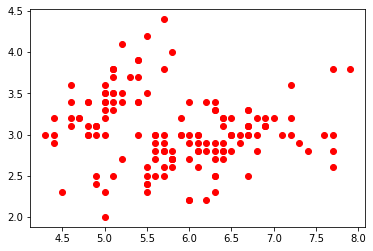

In [ ]:
#Visualizing the dataset features to find pattern to solve our task
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],color='red')
plt.show()

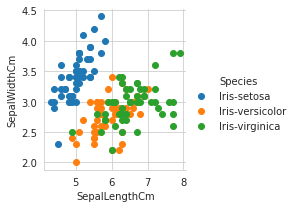

In [ ]:
#Using Seaborn lib to visualized 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(df, hue = 'Species') \
   .map(plt.scatter, 'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

By looking the Scatter plot we can say that all bluepoints(Iris-setosa) are separated perfectly as compare to orange(versicolor) or green(virginica) points for features(SepalLengthCm, SepalwidthCm)

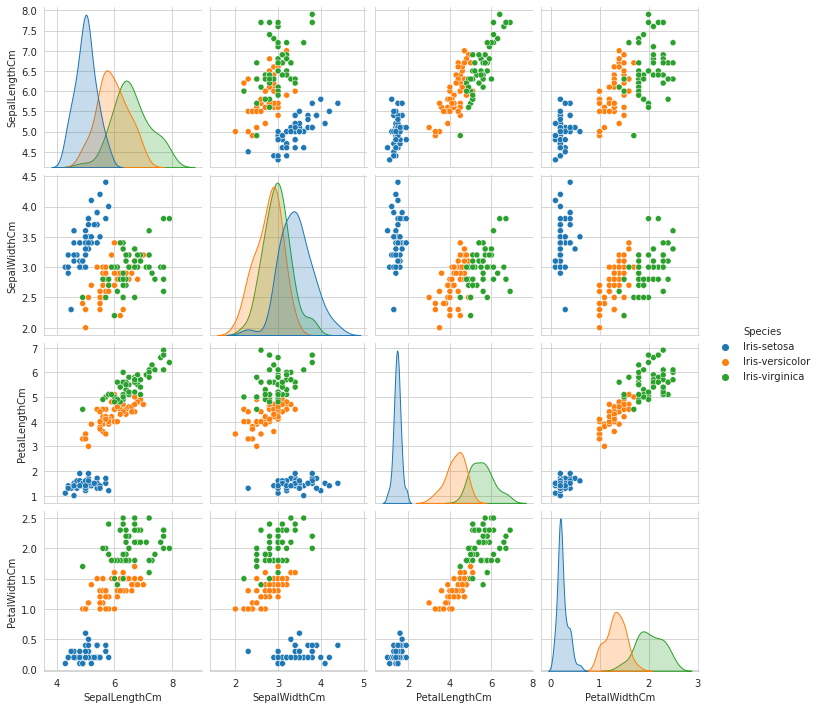

In [ ]:
#Pair plot gives the relationship b/w all features distribution with each other.
sns.pairplot(df.drop(['Id'],axis=1), hue='Species')
plt.show()

The result of pair plot we sure that all blue points are well separated with other two classes. But Versicolor and virginica are partially overlapping with each other.In pair plot we saw that their are some feature combination which has very less overlapping b/w Versicolor and verginica, that's means those feature are very important for our classification task purpose.

**Exploring Some New Features**

Here I just try to find some new feature with the help of exisiting features.Taking difference of each feature with each other to get some more information and visualized it by using plots.

In [ ]:
#Just trying to explore some new feature using the given data...

df['Sepal_diff'] = df['SepalLengthCm']-df['SepalWidthCm']
df['petal_diff'] = df['PetalLengthCm']-df['PetalWidthCm']
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


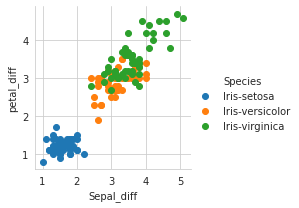

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

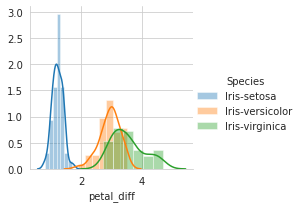

In [ ]:
#Analysed new feature to get some more infomation apart form existing ones.

sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
   .map(plt.scatter,'Sepal_diff','petal_diff')\
   .add_legend()
plt.show()    


sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
   .map(sns.distplot,'petal_diff')\
   .add_legend()
plt.show()

In [ ]:
df['Sepal_petal_len_diff'] = df['SepalLengthCm']-df['PetalLengthCm']
df['Sepal_petal_width_diff'] = df['SepalWidthCm']-df['PetalWidthCm']
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


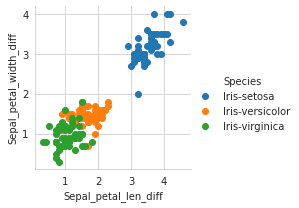

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

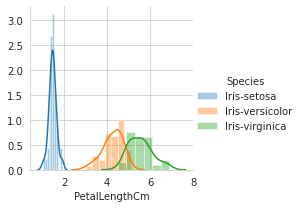

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
   .map(plt.scatter,'Sepal_petal_len_diff','Sepal_petal_width_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
   .map(sns.distplot,'PetalLengthCm')\
   .add_legend()
plt.show()

In [ ]:
df['Sepal_petal_len_wid_diff'] = df['SepalLengthCm']-df['PetalWidthCm']
df['Sepal_petal_wid_len_diff'] = df['SepalWidthCm']-df['PetalLengthCm']
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,4.8,2.2
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,4.4,-2.2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,4.4,-2.5
147,148,6.5,3.0,5.2,2.0,Iris-virginica,4.5,-2.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,3.9,-2.0


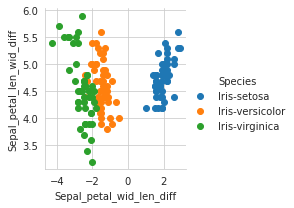

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

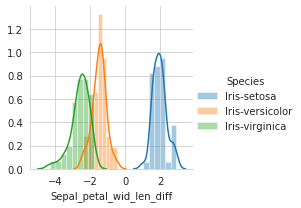

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
   .map(plt.scatter,'Sepal_petal_wid_len_diff','Sepal_petal_len_wid_diff')\
   .add_legend()
plt.show()

sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species')\
   .map(sns.distplot,'Sepal_petal_wid_len_diff')\
   .add_legend()
plt.show()

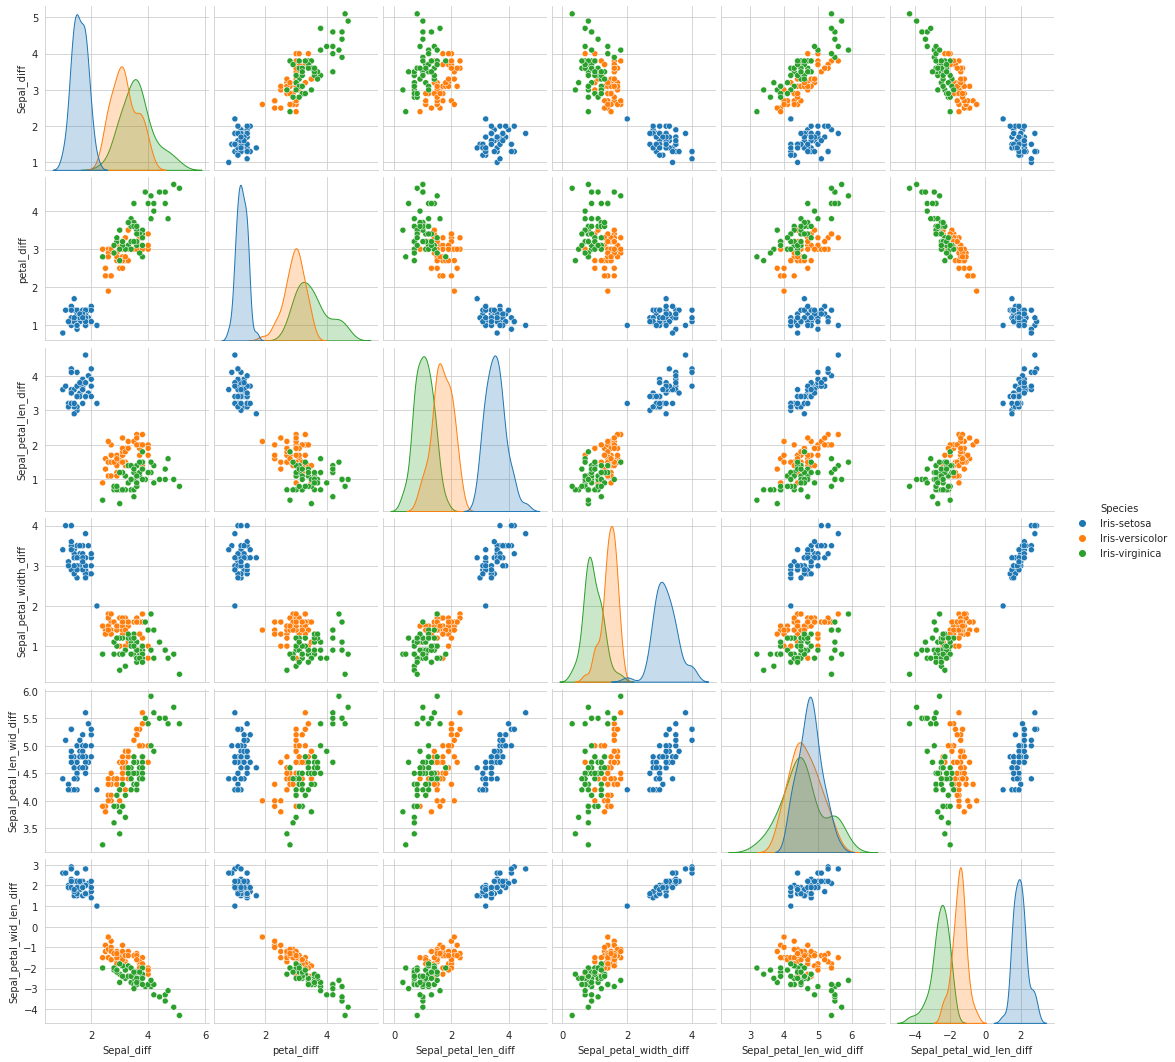

In [ ]:
# Finding relationship b/w new feature based on class labels...

sns.pairplot(df[['Species', 'Sepal_diff', 'petal_diff', 'Sepal_petal_len_diff',\
       'Sepal_petal_width_diff', 'Sepal_petal_len_wid_diff',\
       'Sepal_petal_wid_len_diff']], hue='Species')
plt.show()

With help of Pair plot we are getting some new information but it is more likely similar with our main data features as we saw earlier.Every combination well separate the Iris-setosa but has some overlapped b/w Versicolor and virginica.

In [ ]:
#Droping Id column as it is of no use in classifing the class labels.

df.drop(['Id'],axis=1,inplace=True)

checking distribution plot for each feature in dataset for each class label...

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

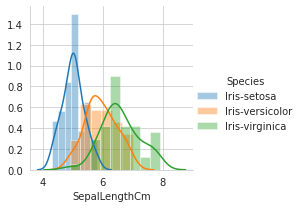

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

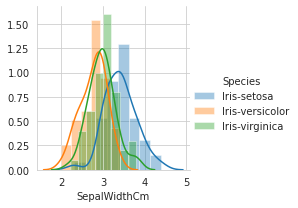

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

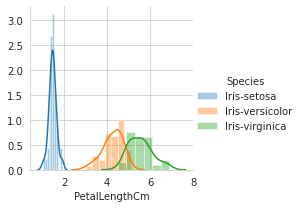

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

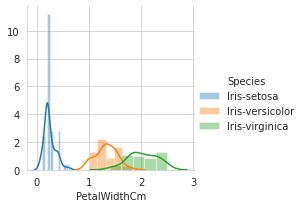

In [ ]:
#exploring distribution plot for all features

for i in df.columns:
    if i == 'Species':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(df,hue='Species')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

[Text(111.60000000000001, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(74.4, 170.84571428571428, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(148.8, 170.84571428571428, 'X[3] <= 1.55\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(74.4, 139.78285714285715, 'X[2] <= 5.0\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(37.2, 108.72, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(111.60000000000001, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(223.20000000000002, 139.78285714285715, 'X[2] <= 5.05\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(186.0, 108.72, 'X[1] <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(148.8, 77.65714285714284, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(223.20000000000002, 77.65714285714284, 'X[3] <= 1.75\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(186.0, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 T

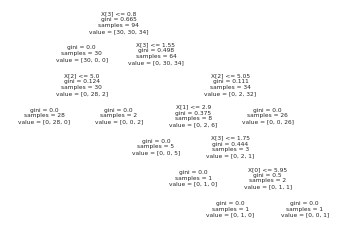

In [ ]:

'''Imporing few library for create Decision tree classifier and visualizing the tree structure'''

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Here we separating independent varibles or target varibles from Iris dataset'''


X = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']]
y = df['Species']


#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


'''Now we have create a Decision tree classifier and trained it with training dataset.'''


Iris_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_clf.fit(Xt, Yt)

#Visualized the Tree which is formed on train dataset

tree.plot_tree(Iris_clf)

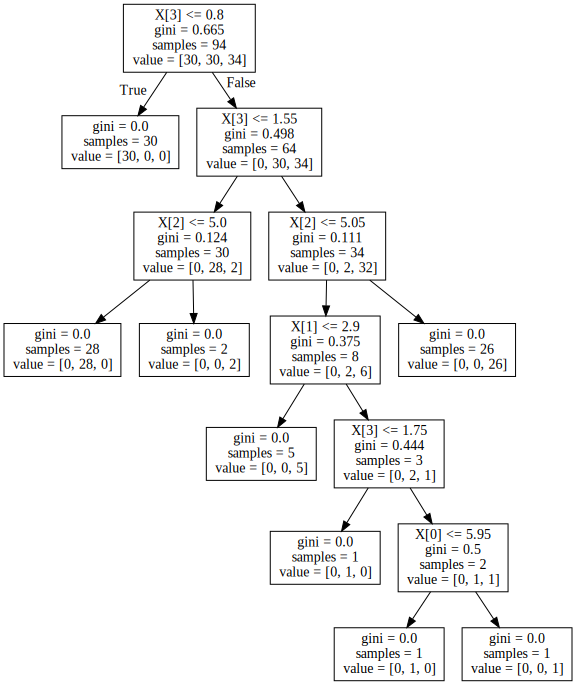

In [ ]:
#Visualizing Decision Tree using graphviz library

dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [ ]:
# As our model has been trained....
#Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.

print('Accuracy score is:',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9361559139784946


In [ ]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]])

In [ ]:
#Checking our model performance on actual unseen test data.. 
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.214\nsamples = 41\nvalue = [0, 36, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.6\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.523076

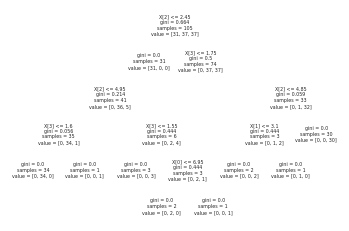

In [ ]:
'''Training model on Actual train data... '''
Iris_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

#Visualize tree structure..
tree.plot_tree(Iris_Fclf)

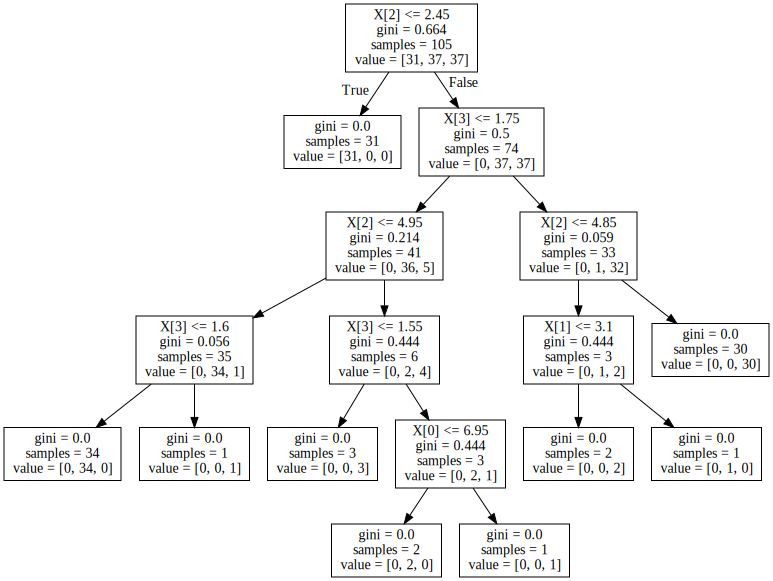

In [ ]:
#Final Decision tree build for deploying in real world cases....

dot_data = tree.export_graphviz(Iris_Fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
#Checking the performance of model on Actual Test data...

YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]])